# Artificial Neural Networks

## Introducton

Inspired by a biological neural network, an ***artificial neural network*** is constantly learning and updating its knowledge and understanding of the environment based on experiences that it encountered.These "updates" are simply a set of mathematical algorithms that work together to perform operations on the input "experience". These operations then produce an output.

Unlike	biological	neural	networks,	where	any	one	neuron	can	be	connected	to	any	other	neuron,	artificial neural	networks	have	a	very	specific	structure.	In	particular,	they	are	composed	of	layers.
	
Each	layer	feeds	into	the	next	layer.	There	are	no	“feedback”	connections.	(Actually	there	can	be,	and these	are	called	recurrent	neural	networks,	but	they	are	outside	the	scope	of	this train.)

## Learning Objectives 
* Understand how to use **Keras Layers** to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the importance of **validation split** and why it's useful


## Architecture	of	an	artificial	neural	network

You	already	saw	what a	neural	network	looks	like	in	the previous Train,	and	how	to	calculate	the	output	of	a logistic	unit. Now we take a look at the architecture of the neural netw 
	
Suppose	we	have	a	2-hidden	layer	neural	network,	where the input layer are images flattened into a vector with length 784 and the last layer is a  Softmax output layer .Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss as our loss function.



![alt text](https://github.com/SiyandzaD/ANNs_Deep_Learning/blob/master/ANN_arc.png?raw=true)

## Let's revisit the MNIST Dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset. However for the scope of this train we will intentionally be avoiding CNNs for now.  




In [0]:
! pip install mnist

## Getting Started

Before we can build any neural networks we need to import a few things from Keras.

In [0]:
import keras
import numpy as np
import mnist

from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from keras.utils import to_categorical


## Preparing the Data

Next we load our dataset (MNIST, using Keras' dataset utilities)

In [0]:

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train


print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,) 


# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 28, 28)
(60000,)


As mentioned earlier, we need to flatten each image before we can pass it into our neural network. We’ll also normalize the pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values is often better).

In [0]:
# Normalize the images.
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print(x_train.shape) # (60000, 784)
print(x_test.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


## A Look At Some Random Digits

It's a good idea to get a sense of the dataset we're working with. Run this code multple times to see new randomly selected digits from the training set.

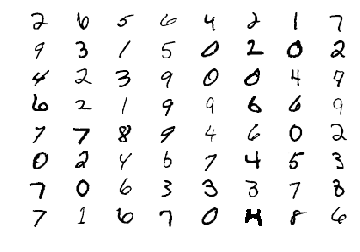

In [0]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Building the Model


Every Keras model is either built using the Sequential class, which represents a linear stack of layers, or the functional Model class, which is more customizeable. We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

We start by instantiating a Sequential model:

In [0]:
model = Sequential([
  # layers...
    
]),

The **Sequential constructor** takes an array of Keras Layers. Since we’re just building a standard feedforward network, we only need the Dense layer, which is your regular fully-connected (dense) network layer.

Let’s throw in 3 Dense layers:

In [0]:
model = Sequential([
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
]),

The first two layers have 64 nodes each and use the ReLU activation function. The last layer is a Softmax output layer with 10 nodes, one for each class.

If you need a refresher, see previous train.

The last thing we always need to do is tell Keras what our network’s input will look like. We can do that by specifying an input_shape to the first layer in sequential model.

In [0]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

Once the input shape is specified, Keras will automatically infer the shapes of inputs for later layers. We’ve finished defining our model! Here’s where we’re at:

In [0]:
"""""#The full code is shown below:


# Normalize the images.
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))


# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])""""

## Compiling the Model

Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:

The optimizer. We’ll stick with a pretty good default: the Adam gradient-based optimizer. Keras has many other optimizers you can look into as well.
The loss function. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), so we’ll use the latter. See all Keras losses.
A list of metrics. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.
Here’s what that compilation looks like:

In [0]:
# Compile model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
),


(None,)

## Training and Evaluating the Model

This code trains and evaluates the model we defined above. It also uses matplotlib and the history object provided by Keras, which tracks how the model behaves through it's training. The history object is worth exploring further, here we are using it to plot training and validation accuracy over time.

Training a model in Keras literally consists only of calling fit() and specifying some parameters. There are a lot of possible parameters, but we’ll only manually supply a few:

* The training data (images and labels), commonly known as X and Y, respectively.
* The number of ***epochs*** (iterations over the entire dataset) to train for.
* The ***batch size*** (number of samples per gradient update) to use when training.

Here’s what that looks like:

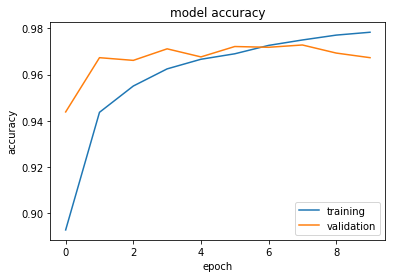

Test loss: 0.125
Test accuracy: 0.966


In [0]:
#Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=False, validation_split=.1)

#Evaluating the model
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## What is the importance of the 'validation split' variable in Keras?

The value of having a validation set is significant and is a vital step to understand how well your model is training. Ideally on a curve you want your training accuracy to be close to your validation curve, and the moment your validation curve falls below your training curve the alarm bells should go off and your model is probably busy over-fitting.

### Tasks

Try improve accuracy of your neural network by changing hyperparameters. (***TIP*** Taking note not to leave ??? unchanged)

In [0]:
"""
# Compile model
model.compile(
  optimizer='???',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
),


#Training the model
history = model.fit(x_train, y_train, batch_size=???, epochs=???, verbose=False, validation_split=.1)

#Evaluating the model
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')"""

https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html


https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3